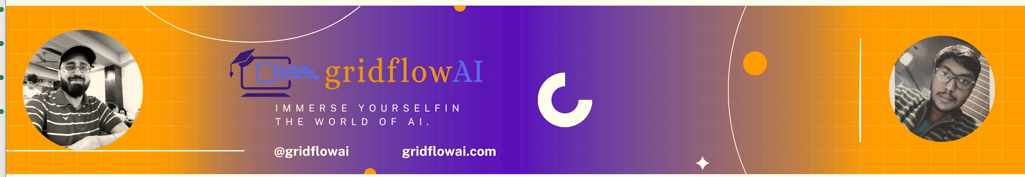

----------------------------
#### Data pre-processing : IMDB dataset
------------------------------

#### dataset 

can be downloaded from this Kaggle link.https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

The file contains 50,000 records and two columns: review and sentiment. 

The review column contains text for the review and the sentiment column contains sentiment for the review. 

The sentiment column can have two values i.e. "positive" and "negative" which makes our problem a binary classification problem.

In [24]:
import pandas as pd
import pandas as pd
import numpy as np
from numpy import array
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pylab as plt

#### Importing and Analyzing the Dataset

In [41]:
location = r'D:\AI-DATASETS\02-MISC-large\keras\datasets\IMDB Dataset.csv'

In [42]:
movie_reviews = pd.read_csv(location)

In [43]:
movie_reviews.isnull().values.any()

False

In [44]:
movie_reviews.shape

(50000, 2)

In [45]:
pd.set_option('max_colwidth', None)

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


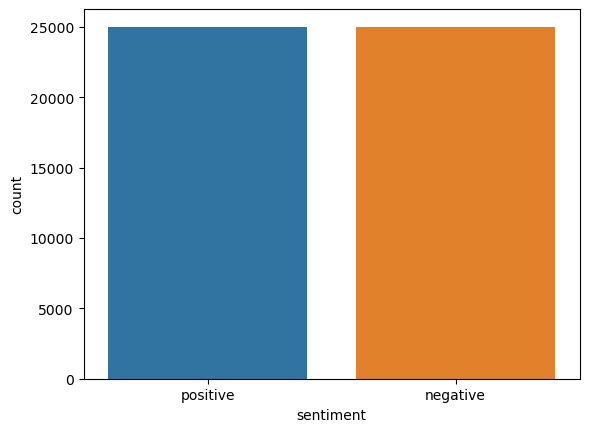

In [46]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews);

From the output, it is clear that the dataset contains equal number of positive and negative reviews

In [47]:
movie_reviews.sample(3)

,review,sentiment
19696,"Like most, I rented this after I heard the universal praise. And despite COUNTLESS bizarre, unexplainable moments along the way, I was very interested and entertained through 100 minutes of the film. Then the two women went to the ""performance"" late at night. The rest of movie (which is another 40 minutes by the way) is even WEIRDER than the first part AND completely contradict and dump on what I had already seen. Then the movie abruptly ends.<br /><br />Baffled, I wandered over to my computer to see if I could buy a clue as to what just happened. Nothing made sense, and I'm a pretty clever guy. None of these other user comments made sense, even when they say ""SPOILERS."" I still have no idea what they're saying. Someone's dream? Not real? Then what's the point of a 2 hour 30 minute movie if it's ""not real?"" Or is it real? I'm forced to make a choice. Either:<br /><br />[a] The movie is a work of genius on a MENSA level and I'm simply too stupid to understand it.<br /><br />[b] The movie is weird for weird's sake and just doesn't make sense. Everyone who loves it is trying to save face and pretend like they ""get"" it.<br /><br />I choose [b]. Screw you guys, I'm going home...",negative
16155,"One of the last classics of the French New Wave. For direction, cineaste Jean Eustache drew from the simplicity of early-century cinema; for story, Eustache drew on the torments of his own complicated love life. So many things can be said of this film - observationally brilliant; self indulgently overlong; occasionally hilarious; emotionally draining...etc. etc. In my mind, whatever complaints that can be leveled against this film are easily overshadowed by its numerous strengths. Every film student, writer, or simply anyone willing to handle a 3 hour film with no abrupt cuts, no music video overstyling, no soap opera-like plot twists, and no banal dialogue should make it a point to see this movie. Everything is to be admired: the writing (concise, clever, surprisingly funny), acting (everyone, quite simply, is perfect in their respective roles), and, simple direction (the viewer feels like a casual observer within the film) make this film unforgettable. This is undoubtedly a film that stays with you.",positive
31437,"As a lover of bad movies, I definitely hit paydirt with this one. The plot isn't really that bad, but there are a few instances where you really have to ask yourself ""what the heck is going on here?""<br /><br />There are many many things that make this the funniest bad movie ever. First off, Rudy Ray Moore had gotten so fat and slow when this movie was filmed that the special effects consist of speeding up the fight scenes to double time. There are also scenes where there is a slow-motion instant replay, jumping onto a ten foot high wall (by playing falling off of it backwards), naked men walking out of huge letters, and sex that literally brings down the roof (with the cable holding up the roof catching on fire).<br /><br />Of course, no Rudy Ray Moore movie would be complete without a completely gratuitous and random comedy club scene where Rudy makes fun of all the customers, interposed with people doing some odd dance. There are so many things bad about this movie, but they're bad in an entertaining way, and if you take your eyes off the movie, you might miss another mistake.<br /><br />Rating: 1/10 for actual value, 10/10 for cheese factor, 10/10 for picking out mistakes and goofs, averages out to 7/10.",positive


#### Data Preprocessing

**1. handling contractions**

In [49]:
#!pip install contractions

In [50]:
import contractions

In [51]:
#contractions.contractions_dict

In [52]:
def detect_contractions(text):
    # Access the internal contractions dictionary
    contractions_dict = contractions.contractions_dict
    
    # Get the list of contractions from the dictionary
    contraction_list = list(contractions_dict.keys())
    
    # Find contractions in the text
    detected_contractions = [word for word in text.split() if word.lower() in contraction_list]
    
    return detected_contractions

In [58]:
# Example usage
text = "I can't believe he's coming. You're going to love it!"
detected_contractions = detect_contractions(text)
detected_contractions

["can't", "he's", "You're"]

In [73]:
movie_reviews['contractions'] = movie_reviews['ExpandedText'].apply(detect_contractions)

In [76]:
movie_reviews.sample(5)

,review,sentiment,contractions,ExpandedText
20820,"I know I should like this film, and I do for the most part, but as other's have mentioned, it is a bit long in the tooth. I to also found the raging hormones of the all male crew to be a bit annoying. It's a wonder they didn't start panting and howling at the moons as well. I also have to say that overall, the movie leaves me cold. It's a very sterile atmosphere that permeates the film. On the plus side the effects are great (besides the cartoon monster), as are the effects, props, costumes and of course Robbie. If the robot was not in this film, I don't think it would have been as popular as it was/is. The second half of the movie picks up steam once we start to investigate the forgotten gadgets of the ""Krell."" As many times as I've seen this movie, the Krell still leaves me scratching my head as to exactly who or what they were. Based on what was being produced at that time, besides ""This Island Earth,"" Forbidden Planet is miles above the average Sci-Fi movies of the time. Being filmed in color also adds to its enjoyment. Certainly a classic in its own right, flaws and all, and deservedly so.",positive,[],"I know I should like this film, and I do for the most part, but as other's have mentioned, it is a bit long in the tooth. I to also found the raging hormones of the all male crew to be a bit annoying. It is a wonder they did not start panting and howling at the moons as well. I also have to say that overall, the movie leaves me cold. It is a very sterile atmosphere that permeates the film. On the plus side the effects are great (besides the cartoon monster), as are the effects, props, costumes and of course Robbie. If the robot was not in this film, I do not think it would have been as popular as it was/is. The second half of the movie picks up steam once we start to investigate the forgotten gadgets of the ""Krell."" As many times as I have seen this movie, the Krell still leaves me scratching my head as to exactly who or what they were. Based on what was being produced at that time, besides ""This Island Earth,"" Forbidden Planet is miles above the average Sci-Fi movies of the time. Being filmed in color also adds to its enjoyment. Certainly a classic in its own right, flaws and all, and deservedly so."
49849,"I saw this film at Amsterdam's International Documentary Film Festival and was privileged to meet both the directors and Tobias Schneebaum, all of whom are lively and outspoken New Yorkers. The film's title in Amsterdam was Keep the River on Your Right, making the sensational aspect of cannibalism somewhat less prominent. Equally important was the loving - and gay - relationship Tobias Schneebaum had with members of the groups he studied as an anthropologist. His reunion at nearly 80 years of age and inevitable leave-taking were very moving. I can only highly recommend this film to anyone looking for a moving story that is anything but pedestrian.",positive,[],"I saw this film at Amsterdam's International Documentary Film Festival and was privileged to meet both the directors and Tobias Schneebaum, all of whom are lively and outspoken New Yorkers. The film's title in Amsterdam was Keep the River on Your Right, making the sensational aspect of cannibalism somewhat less prominent. Equally important was the loving - and gay - relationship Tobias Schneebaum had with members of the groups he studied as an anthropologist. His reunion at nearly 80 years of age and inevitable leave-taking were very moving. I can only highly recommend this film to anyone looking for a moving story that is anything but pedestrian."
750,"I was surprised that "" Forgiving the Franklins "" did not generate more buzz at this years Sundance Film Festival. There were times that the laughter at the screening I saw was so loud that you could barely hear the movie. The movie has some excellent acting and a story that really makes one examine broader issues . You know little issues like Religion, 

In [67]:
# Function to expand contractions in a text column
def expand_contractions_in_column(text):
    return contractions.fix(text)

In [69]:
# Sample DataFrame
test_data = {'TextColumn': ["I can't believe he's coming.", 
                            "You're going to love it!", 
                            "They won't attend the event."]}
test_df   = pd.DataFrame(test_data)

In [71]:
# Apply the function to the 'TextColumn'
test_df['ExpandedText'] = test_df['TextColumn'].apply(expand_contractions_in_column)

# Display the DataFrame
print(test_df)

                     TextColumn                     ExpandedText
0  I can't believe he's coming.   I cannot believe he is coming.
1      You're going to love it!        You are going to love it!
2  They won't attend the event.  They will not attend the event.


.. back to the main code ...

In [72]:
# Apply the function to the 'TextColumn'
movie_reviews['ExpandedText'] = movie_reviews['review'].apply(expand_contractions_in_column)

**remove punc, single char words, multiple spaces**

In [77]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [78]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In the __preprocess_text()__ method the first step is to remove the HTML tags. To remove the HTML tags, __remove_tags()__ function has been defined. 

The remove_tags function simply replaces anything between opening and closing <> with an empty space.

Next, in the __preprocess_text__ function, everything is removed except capital and small English letters, which results in single characters that make no sense. For instance, when you remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s".

Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. 

Finally, we remove the multiple spaces from our text as well.

In [82]:
%%time
movie_reviews['CleanedText'] = movie_reviews['ExpandedText'].apply(preprocess_text)

CPU times: total: 2.78 s
Wall time: 9.54 s


In [83]:
# %%time
# X = []

# sentences = list(movie_reviews['ExpandedText'])

# for sen in sentences:
#     X.append(preprocess_text(sen))

In [84]:
movie_reviews.sample(5)

,review,sentiment,contractions,ExpandedText,CleanedText
15440,"I'm not sure if these other people saw the movie - some apparently couldn't follow the ""complicated plot"". He's a billionaire who owns an oil company who ALSO happens to big game hunt - wow - that's really far fetched. Any way - his new ""drilling machine"" happens to break through a glacier and on the other side is a world seperated from our own time where dinosaurs and cavemen wander around. Nothing ground breaking about this but it certainly isn't ludicrous. Anyway the rest of the movie is about this T-Rex they find (which the billionaire, Boone, claimed was there) hunting them and them hunting it. Look - it's an old made for TV movie - of course the special effects look cheesy - they didn't have CG - they did the best they could and for a MFTVM they did a hell of a job for the time. This movie should be remade for the big screen - I'd love it and I'd be the first one in line. Seeing that Dinosaur with modern day special effects stalking those guys would be great!",positive,[],"I am not sure if these other people saw the movie - some apparently could not follow the ""complicated plot"". He is a billionaire who owns an oil company who ALSO happens to big game hunt - wow - that is really far fetched. Any way - his new ""drilling machine"" happens to break through a glacier and on the other side is a world seperated from our own time where dinosaurs and cavemen wander around. Nothing ground breaking about this but it certainly is not ludicrous. Anyway the rest of the movie is about this T-Rex they find (which the billionaire, Boone, claimed was there) hunting them and them hunting it. Look - it is an old made for TV movie - of course the special effects look cheesy - they did not have CG - they did the best they could and for a MFTVM they did a hell of a job for the time. This movie should be remade for the big screen - I would love it and I would be the first one in line. Seeing that Dinosaur with modern day special effects stalking those guys would be great!",I am not sure if these other people saw the movie some apparently could not follow the complicated plot He is billionaire who owns an oil company who ALSO happens to big game hunt wow that is really far fetched Any way his new drilling machine happens to break through glacier and on the other side is world seperated from our own time where dinosaurs and cavemen wander around Nothing ground breaking about this but it certainly is not ludicrous Anyway the rest of the movie is about this Rex they find which the billionaire Boone claimed was there hunting them and them hunting it Look it is an old made for TV movie of course the special effects look cheesy they did not have CG they did the best they could and for MFTVM they did hell of job for the time This movie should be remade for the big screen would love it and would be the first one in line Seeing that Dinosaur with modern day special effects stalking those guys would be great
38804,"And so it started with ""Shreik"" a send up of horror films, then we had Scary Movie, a genuinely good attempt at a new kind of genre, the illustrious send up. however....now we have: Scary Movie* Scary Movie 2 Scary Movie 3 Scary Movie 4* Date Movie Meet The Spartans Not Another Team movie* plus many more (genuinely funny movies marked with *)<br /><br />and.....Super hero movie.... it seems the people that make these movies cannot yet grasp what makes the send-ups funny. using the rip-offs from other movies in a funny way is all well and good if done properly, but not many producers seem to know how to do that. Scary movie(1) did it well, the following sequels were then horrendous as the tried to over play the franchise, but it was redeemed by Scary Movie 4. Not another teen movie was good because it used the spoofs well...and to its credit i am sick of teen movies. however, this movie plays like a bad version of all of these. it relies on slap stick the would make even th

In [87]:
movie_reviews.to_csv(r'D:\AI-DATASETS\02-MISC-large\keras\datasets\IMDB-cleaned-text.csv')